# 03. Convolutional Neural Networks and Computer Vision with TensorFlow

## Get the data

Due to how well convolutional NN's work with images, a dataset of images will be used to understand them.

The images are from the [Food-101 dataset](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/), a databace of 101 catagories of different images of food (1,000 images per catogorie).

To start, only images of pizza 🍕 and steak 🥩 will be used to build a binary classsifier.



In [ ]:
# Download the 'pizza_steak' subset .zip file and unzip it.
import zipfile

# Download the 'pizza_steak' zip file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-11-09 13:52:22--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.74.128, 209.85.145.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.74.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   169MB/s    in 0.6s    

2021-11-09 13:52:22 (169 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A vital first step for any machine learning project is becoming one with the data. That means understanding the data to be worked on, usally through lots of visualization and folder scanning.

This file structure has been formated to be in a typical format encountered when working with images.

More specifically:
* A train directory with all the images in the training set with subfolders contaning the different catogories of images.
* A test directory that uses the same structure.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
# see what is inside one of the folders
!ls pizza_steak/train/

pizza  steak


In [ ]:
# and inside the steak directory?
!ls pizza_steak/train/steak
# ALOT of images!

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list num of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 1 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# Another way to see how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # convert the training path into a python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [ ]:
# Now that there is a collection of training & testing images, view one of them
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random

# 
def view_random_image(target_dir, target_class):
  # Setup target directory to view images from
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mping.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape: {img.shape}") # show the shape of the image

  return img

image shape: (512, 512, 3)


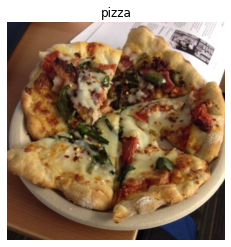

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [ ]:
# view the image in array/tensor form:
img

array([[[ 31,  32,  50],
        [ 29,  30,  48],
        [ 27,  28,  46],
        ...,
        [227, 223, 224],
        [248, 244, 245],
        [251, 247, 248]],

       [[ 28,  29,  47],
        [ 29,  30,  48],
        [ 29,  30,  48],
        ...,
        [228, 226, 227],
        [249, 247, 248],
        [253, 251, 252]],

       [[ 27,  28,  46],
        [ 30,  31,  49],
        [ 32,  33,  51],
        ...,
        [235, 233, 234],
        [252, 250, 251],
        [254, 252, 253]],

       ...,

       [[ 21,  16,  22],
        [ 21,  16,  22],
        [ 20,  15,  19],
        ...,
        [ 41,  27,  26],
        [ 46,  32,  31],
        [ 51,  35,  35]],

       [[ 18,  13,  19],
        [ 19,  14,  20],
        [ 19,  14,  18],
        ...,
        [ 42,  28,  27],
        [ 46,  32,  31],
        [ 49,  34,  31]],

       [[ 17,  12,  18],
        [ 18,  13,  19],
        [ 19,  14,  20],
        ...,
        [ 41,  27,  26],
        [ 43,  29,  26],
        [ 46,  31,  28]]

In [ ]:
# View the image shape
img.shape # returns (with, height, color channels)

(512, 512, 3)

In [ ]:
# To normalize the data, get all pixel values between 0 & 1
img/255.

array([[[0.12156863, 0.1254902 , 0.19607843],
        [0.11372549, 0.11764706, 0.18823529],
        [0.10588235, 0.10980392, 0.18039216],
        ...,
        [0.89019608, 0.8745098 , 0.87843137],
        [0.97254902, 0.95686275, 0.96078431],
        [0.98431373, 0.96862745, 0.97254902]],

       [[0.10980392, 0.11372549, 0.18431373],
        [0.11372549, 0.11764706, 0.18823529],
        [0.11372549, 0.11764706, 0.18823529],
        ...,
        [0.89411765, 0.88627451, 0.89019608],
        [0.97647059, 0.96862745, 0.97254902],
        [0.99215686, 0.98431373, 0.98823529]],

       [[0.10588235, 0.10980392, 0.18039216],
        [0.11764706, 0.12156863, 0.19215686],
        [0.1254902 , 0.12941176, 0.2       ],
        ...,
        [0.92156863, 0.91372549, 0.91764706],
        [0.98823529, 0.98039216, 0.98431373],
        [0.99607843, 0.98823529, 0.99215686]],

       ...,

       [[0.08235294, 0.0627451 , 0.08627451],
        [0.08235294, 0.0627451 , 0.08627451],
        [0.07843137, 0

## A (typical) architecture of a convolutional neural network

Convolutional neural networks are no different to other kinds of deep learning neural networks in the fact they can be created in many different ways. Below are components of a traditional CNN:


Components of a convolutional neural network:

| **Hyperparameter/Layer type** | **What does it do?** | **Typical values** |
| ----- | ----- | ----- |
| Input image(s) | Target images you'd like to discover patterns in| Whatever you can take a photo (or video) of |
| Input layer | Takes in target images and preprocesses them for further layers | `input_shape = [batch_size, image_height, image_width, color_channels]` |
| Convolution layer | Extracts/learns the most important features from target images | Multiple, can create with [`tf.keras.layers.ConvXD`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) (X can be multiple values) |
| Hidden activation | Adds non-linearity to learned features (non-straight lines) | Usually ReLU ([`tf.keras.activations.relu`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu)) |
| Pooling layer | Reduces the dimensionality of learned image features | Average ([`tf.keras.layers.AvgPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D)) or Max ([`tf.keras.layers.MaxPool2D`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D)) |
| Fully connected layer | Further refines learned features from convolution layers | [`tf.keras.layers.Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) |
| Output layer | Takes learned features and outputs them in shape of target labels | `output_shape = [number_of_classes]` (e.g. 3 for pizza, steak or sushi)|
| Output activation | Adds non-linearities to output layer | [`tf.keras.activations.sigmoid`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid) (binary classification) or [`tf.keras.activations.softmax`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) |

How they stack together:

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-simple-convnet.png)
*A simple example of how you might stack together the above layers into a convolutional neural network. Note the convolutional and pooling layers can often be arranged and rearranged into many different formations.*

In [ ]:
# the model replicates TinyVGG, the computer vision architecture which fuels the [CNN explainer webpage](https://poloclub.github.io/cnn-explainer/).
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 0. Set the seed
tf.random.set_seed(42)

# Preprocess data (normalize the pixels)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train $ test directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                                batch_size=32, # Num of images to process at the same time
                                                target_size=(224, 224), # convert all images into 244*244 pixels
                                                class_mode="binary", # type of problem
                                                seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# 1. Create a CNN model (same as Tiny VGG)
model_1 = tf.keras.models.Sequential([
                                      tf.keras.layers.Conv2D(filters=10,
                                                             kernel_size=3, #or (3,3)
                                                             activation="relu",
                                                             input_shape=(224, 224, 3)), # Specifies imput shape of image
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2, #or (2,2)
                                                                padding="valid"), #or 'same'
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"),
                                      tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1, activation="sigmoid") # outputs binary classification
])

# 2. Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 43s 257ms/step - loss: 0.5387 - accuracy: 0.7140 - val_loss: 0.3634 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 11s 227ms/step - loss: 0.4071 - accuracy: 0.8200 - val_loss: 0.3253 - val_accuracy: 0.8760
Epoch 3/5
47/47 [==============================] - 11s 224ms/step - loss: 0.4202 - accuracy: 0.8087 - val_loss: 0.4038 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 11s 227ms/step - loss: 0.3649 - accuracy: 0.8460 - val_loss: 0.3148 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.3281 - accuracy: 0.8660 - val_loss: 0.3513 - val_accuracy: 0.8500


In [ ]:
# Check out the layers
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before

Neural networks can be adapted to many different problems.

> 🔑 **Note:** If you haven't gone through the previous classification notebook, no troubles, we'll be bringing in the a simple 4 layer architecture used to separate dots replicated from the [TensorFlow Playground environment](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.75075&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

The same parameters in the previous model can be used except for changing two things:
* **The data** - Images instead of dots.
* **The input shape** - The neural network must know the shape of the images its working with.
  * A common practice is to reshape images all to one size. For this case, resize the images to `(224, 224, 3)`, meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # # dense layers expect a 1-dimensional vector as input
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_2 = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data, # use same validation data created above
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 211ms/step - loss: 1.0297 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


The model did not learn anything. It only reaches 50% accuracy, which is as good as guessing.

In [ ]:
# Check out the second model's architecture
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


One of the most noticeable things here is the much larger number of parameters in `model_2` versus `model_1`.

`model_2` has 602,141 trainable parameters where as `model_1` has only 31,101. And despite this difference, `model_1` still far and large out performs `model_2`.

> 🔑 **Note:** You can think of trainable parameters as *patterns a model can learn from data*. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

> 🔑 **Note:** Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the **complexity** of your model.



In [ ]:
# 0. Set random seed
tf.random.set_seed(42)

# 1. Create the model with more complexity than model 2 (add an extra layer and increase the number of hidden units in each layer)
model_3 = tf.keras.Sequential([
                               # Practice spelling: input_shape, input_shape, input_shape, input_shape, input_shape, input_shape, input_shape, input_shape, input_shape, input_shape, input_shape, input_shape, Input_shapem input_shape, input_shape, input_shape, input_shape, input_shape, input_shape, input_shape, input_shape
                               tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
                               tf.keras.layers.Dense(100, activation="relu"), # increase number of neurons from 4 to 100 (for each layer)
                               tf.keras.layers.Dense(100, activation="relu"),
                               tf.keras.layers.Dense(100, activation="relu"), # this is the extra layer
                               tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 2.4860 - accuracy: 0.6393 - val_loss: 0.8070 - val_accuracy: 0.6820
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.8841 - accuracy: 0.6787 - val_loss: 0.6855 - val_accuracy: 0.7400
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6923 - accuracy: 0.7133 - val_loss: 0.8717 - val_accuracy: 0.6780
Epoch 4/5
47/47 [==============================] - 9s 199ms/step - loss: 0.5715 - accuracy: 0.7480 - val_loss: 0.4197 - val_accuracy: 0.7980
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.4868 - accuracy: 0.7813 - val_loss: 0.4177 - val_accuracy: 0.8080


Yay! The modelis once again learning. It has ~70% accuracy on both the training & validation set. 

Check the architecture:

In [ ]:
# Check the model_3 architecture
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


That is a HUGE number of trainable parameters! Even with 500x more trainable prameters than model_3, model_3 still does not outpreform model_1.add

This is the power of convolutional neural networks & their ability to learn patterns. In oreder for general AI to be feasable, more structures like this must be invented/discovered.

## Binary classification: Let's break it down

We just went through a whirlwind of steps:

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

Let's step through each.

### 1. Import and become one with the data

Whatever kind of data must be processed, it is a good idea to visualize at least 10-100 sampels to build a mental model of the data.

After looking through the data, it is observed that steak images thend to have darker colors while pizza images tend to have a round shape in the middle. These are patterns a neural network can pick up.

Also, flaws in the data can be discovered and fixed.

> 📖 **Resource:** To see how this data was processed into the file format we're using, see the [preprocessing notebook](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb).



In [ ]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# # Unzip the downloaded file
# zip_ref = zipfile.zipfile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

image shape: (384, 512, 3)
image shape: (512, 512, 3)


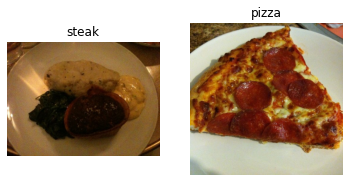

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Visualize data (requires function "view_random_image" above)
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

One of the most important steps for a machine learning project is creating a training and test set.

In this case, the data is already split into training & test sets. Another option is to create a validation set. 

For an image classification project, it's standard to have the data seperated into `train` and `test` directories with subfolders in each for each class.

To start, define the training & test directory paths.

In [ ]:
# Define training & test directory paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

The next step is to turn our data into **batches**.

A **batch** is a small subset of the dataset a model looks at during training. For example, rather than looking at 10,000 images at one time and trying to figure out the patterns, a model might only look at 32 images at a time.

It does this for a couple of reasons:
* 10,000 images (or more) might not fit into the memory of the processor (GPU).
* Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

A [batch size of 32 is good for ones health](https://twitter.com/ylecun/status/989610208497360896?s=20). 

There are many different possible batch sizes but 32 has proven to be very effective in many different use cases and is often the default for many data preprocessing functions.

To turn data into batches, first create an instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) for each of our datasets.

In [ ]:
# Create, train, & test data generators & rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The `ImageDataGenerator` class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

You might've noticed the `rescale` parameter. This is one example of the transformations we're doing.

Remember from before how we imported an image and it's pixel values were between 0 and 255?

The `rescale` parameter, along with `1/255.` is like saying "divide all of the pixel values by 255". This results in all of the image being imported and their pixel values being normalized (converted to be between 0 and 1).

> 🔑 **Note:** For more transformation options such as data augmentation (we'll see this later), refer to the [`ImageDataGenerator` documentation](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

Now we've got a couple of ImageDataGenerator instances, we can load our images from their respective directories using the [`flow_from_directory`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory) method.

In [ ]:
# Turn the data from ImageDataGenerator into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


The training dataset has 1500 images belonging to 2 classes (pizza and steak) while the test dataset has 500 images also belonging to 2 classes.

Some things to know:
* Due to how the class directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
* The `target_size` parameter defines the input size of our images in `(height, width)` format.
* The `class_mode` value of `'binary'` defines the classification problem type. For more than two classes, use `'categorical'`.
* The `batch_size` defines how many images will be in each batch, 32 is the default due to how good it is on average.

Batched images and labels can be seen by inspecting the `train_data` object.

In [ ]:
# Get a sample of the training data batch
images, labels = train_data.next() # Get the next batch of images/labels
len(images), len(labels) #  images and labels are in batches of 32

(32, 32)

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

Thanks to the `rescale` parameter, the images are now in `(224, 224, 3)` shape tensors with values between 0 and 1.

How about the labels?

In [ ]:
# View the first batch of labels:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Due to the `class_mode` parameter being `'binary'`, labels are either `0` (pizza) or `1` (steak).

Now that the data is ready, the model will try and figure out the patterns between the image tensors and the labels.

### 3. Create a model (start with a baseline)

There are many possible default model architectures.

A simple heuristic for computer vision models is to use the model architecture which is performing best on [ImageNet](https://www.image-net.org/) (a large collection of diverse images to benchmark different computer vision models).

However, to begin with, it's good to build a smaller model to acquire a baseline result which can be improved upon.

> 🔑 **Note:** In deep learning a smaller model often refers to a model with less layers than the state of the art (SOTA). For example, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers.

In this case, a smaller version of the model that can be found on the [CNN explainer website](https://poloclub.github.io/cnn-explainer/) (`model_1` from above) and build a 3 layer convolutional neural network.

In [ ]:
# Make the creating of model_4 a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create model_4 (this is the baseline, a 3 layer convolutional Neural Network)
model_4 = Sequential([
                      Conv2D(filters=10,
                             kernel_size=3,
                             strides=1,
                             padding='valid',
                             activation='relu',
                             input_shape=(224, 224, 3)), # Input layer input_shape
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      Flatten(),
                      Dense(1, activation='sigmoid') # output layer (specifyes output shape)
])

In [ ]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

Since this is a binary classification problem (pizza vs. steak), the `loss` function is `'binary_crossentropy'`, if it was mult-iclass, something like `'categorical_crossentropy'` might be used instead.

Adam with all the default settings is the optimizer and the evaluation metric is accuracy.

### 4. Fit a model

Once the model is compiled, time to fit it.

There are two parameters to note:
* `steps_per_epoch` - this is the number of batches a model will go through per epoch, in this case, the model should go through all batches so it's equal to the length of `train_data` (1500 images in batches of 32 = 1500/32 = ~47 steps)
* `validation_steps` - same as above, except for the `validation_data` parameter (500 test images in batches of 32 = 500/32 = ~16 steps)

In [ ]:
# Find the lengths of training & test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 249ms/step - loss: 1.5179 - accuracy: 0.6673 - val_loss: 0.4542 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4587 - accuracy: 0.7973 - val_loss: 0.4210 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3408 - accuracy: 0.8633 - val_loss: 0.3941 - val_accuracy: 0.8260
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.1753 - accuracy: 0.9480 - val_loss: 0.3965 - val_accuracy: 0.8200
Epoch 5/5
47/47 [==============================] - 11s 238ms/step - loss: 0.0773 - accuracy: 0.9827 - val_loss: 0.4470 - val_accuracy: 0.8040


### 5. Evaluate the model

Check out the models training graph.

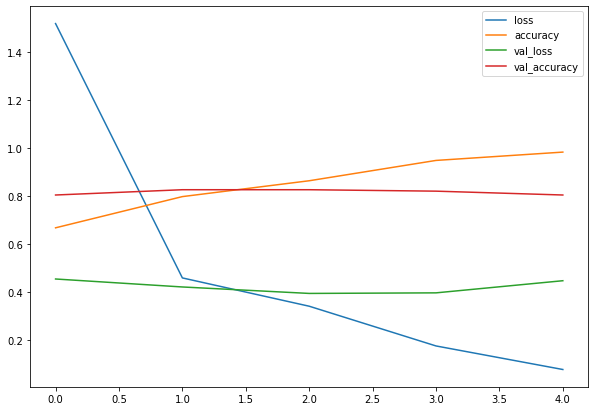

In [ ]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus its ability to generalize to unseen data will be diminished.

To further inspect model 4's training performance, separate the accuracy and loss curves.

In [ ]:
# Plot the validation & training data separately
def plot_loss_curves(history):
  """
  Returns seperate loss surves for training & validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

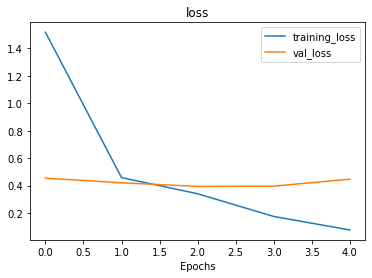

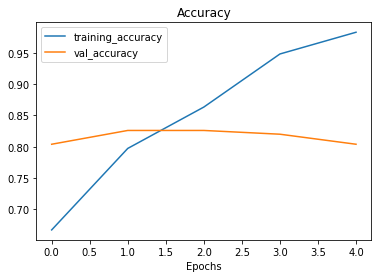

In [ ]:
# Find the loss &  accuracy curves of model_4
plot_loss_curves(history_4)

The ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means the model is probably overfitting.

In [ ]:
# Check out the model aechitecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 6. Adjust the model parameters

3 steps to fit a ML model:
0. Create a baseline.
1. Beat the baseline by overfitting a larger model.
2. Reduce overfitting.

Steps 0 & 1 were previestly covered.

There are a few additional ways to overfit:
* Increase the number of convolutional layers.
* Increase the number of convolutional filters.
* Add another dense layer to the output of our flattened layer.

But first is step 2. Getting our model's training curves to better align with eachother.

Why is reducing overfitting important?

When a model performs too well on training data and poorly on unseen data, it's not much use in the real world.

The next few models will have an adjusted number of parameters while inspecting the training curves along the way.

Specificly, 2 models:
* A ConvNet with [max pooling](https://deeplizard.com/learn/video/ZjM_XQa5s6s)
* A ConvNet with max pooling and data augmentation

The first model will use the modified basic CNN structure:

```
Input -> Conv layers + ReLU layers (non-linearities) + Max Pooling layers -> Fully connected (dense layer) as Output
```

Built it! It'll have the same structure as `model_4` but with a [`MaxPool2D()`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D) layer after each convolutional layer.

In [ ]:
# Create the model (this is the baseline, a 3-layer Convolutional Neural Network)
model_5 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2), # reduce num features by 1/2
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

If convolutional layers learn the features of an image, Max Pooling layers figure out the most important of those features. An example of this will follow.

In [ ]:
# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 218ms/step - loss: 0.6187 - accuracy: 0.6540 - val_loss: 0.4813 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4654 - accuracy: 0.7847 - val_loss: 0.4040 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4234 - accuracy: 0.8173 - val_loss: 0.4122 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4071 - accuracy: 0.8227 - val_loss: 0.3323 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 10s 216ms/step - loss: 0.3768 - accuracy: 0.8400 - val_loss: 0.3503 - val_accuracy: 0.8480


The model with max pooling (`model_5`) is performing worse on the training set but better on the validation set.

Before checking out its training curves, check out its architecture.

In [ ]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

Notice what's going on here with the output shape in each `MaxPooling2D` layer.

It gets halved each time. This is effectively the `MaxPooling2D` layer taking the outputs of each Conv2D layer and saying "I only want the most important features, get rid of the rest".

The bigger the `pool_size` parameter, the more the max pooling layer will squeeze the features out of the image. However, too big and the model might not be able to learn anything.

The results of this pooling are seen in a major reduction of total trainable parameters (8,861 in `model_5` and 477,431 in `model_4`).

Time to check out the loss curves.

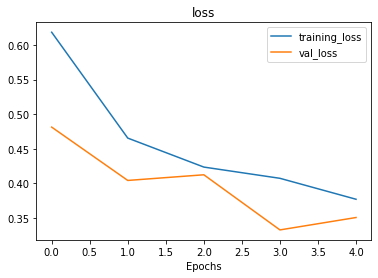

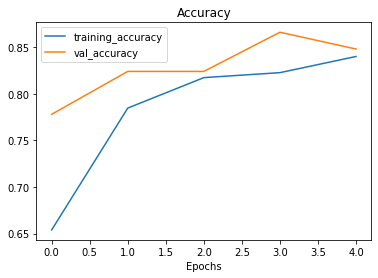

In [ ]:
# Plot loss curves of model_5 results
plot_loss_curves(history_5)

After MaxPooling, the training curves get a lot closer to eachother. However, the validation loss looks to start increasing towards the end and in turn potentially leading to overfitting.

Time to try another method of overfitting prevention, data augmentation.

First code, followed by discussion.

To implement data augmentation, we'll have to reinstantiate the [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) instances.

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)


> 🤔 **Question:** What's data augmentation?

**Data augmentation** is the process of altering the training data, leading to it having more diversity and in turn allowing a model to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Doing this simulates the kind of data a model might be used on in the real world.

Consider a pizza vs. steak application, not all of the images the users take might be in similar setups to the models training data. Using data augmentation gives us another way to prevent overfitting and in turn make our model more generalizable.

> 🔑 **Note:** Data augmentation is usally only performed on the training data. Using the `ImageDataGenerator` built-in data augmentation parameters, images are left as they are in the directories but are randomly manipulated when loaded into the model.

In [ ]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')


Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [ ]:
# (remember our motto? Visualize, visualize, visualize...)
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels are unaugmented, they are unchanged

28


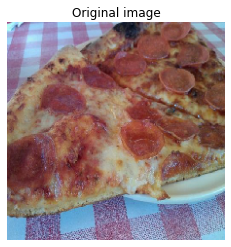

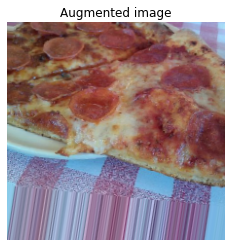

In [ ]:
# Show original & augmented image
random_number = random.randint(0, 31) # Since batch size is 32, range 0-32 to get random instance
print(random_number)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

After going through a sample of original and augmented images, some of the example transformations on the training images become apparent.

Notice how some of the augmented images look like slightly warped versions of the original image. This means the model will be forced to try and learn patterns in less-than-perfect images, which is often the case when using real-world images.

> 🤔 **Question:** Should I use data augmentation? And how much should I augment?

Data augmentation is a way to try and prevent a model overfitting. If a model is overfiting (e.g. the validation loss keeps increasing), try using data augmentation.

As for how much to data augment, there's no set practice for this. Best to check out the options in the `ImageDataGenerator` class and think about how a model in your use case might benefit from some data augmentation.

Now that theres augmented data, refit a model on it and see how it affects training.

The same model as `model_5` will be used.

In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2), # reduce num features by 1/2
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 525ms/step - loss: 0.7058 - accuracy: 0.4647 - val_loss: 0.6835 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 24s 512ms/step - loss: 0.6918 - accuracy: 0.5467 - val_loss: 0.6706 - val_accuracy: 0.5540
Epoch 3/5
47/47 [==============================] - 24s 519ms/step - loss: 0.6912 - accuracy: 0.5267 - val_loss: 0.6310 - val_accuracy: 0.7320
Epoch 4/5
47/47 [==============================] - 24s 512ms/step - loss: 0.6771 - accuracy: 0.6293 - val_loss: 0.6057 - val_accuracy: 0.7080
Epoch 5/5
47/47 [==============================] - 24s 508ms/step - loss: 0.5965 - accuracy: 0.7080 - val_loss: 0.9942 - val_accuracy: 0.5040


The model did not get good results on the training set at first bue to data shuffling in train_data_augmented being turned off by using `shuffle=False`which means the model only sees a batch of a single kind of images at a time. 

For example, the pizza class gets loaded in first because it's the first class. Thus it's performance is measured on only a single class rather than both classes. The validation data performance improves steadily because it contains shuffled data.

This can be fixed by setting `shuffle=True` on future data generators.

Each epoch takes longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).

This is because the `ImageDataGenerator` instance augments the data as it's loaded into the model. The benefit of this is that it leaves the original images unchanged. The downside is that it takes longer to load them in.

> 🔑 **Note:** One possible method to speed up dataset manipulation would be to look into [TensorFlow's parrallel reads and buffered prefecting options](https://www.tensorflow.org/tutorials/images/data_augmentation).

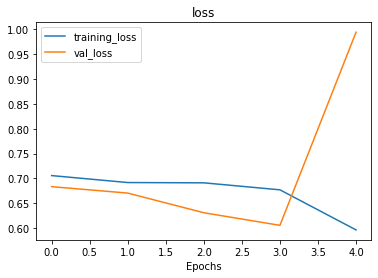

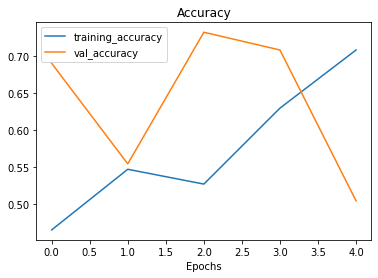

In [ ]:
# Check models preformance history training on augmented data
plot_loss_curves(history_6)

It seems the validation loss curve is heading in the right direction but it's a bit jumpy (the most ideal loss curve isn't too spiky but a smooth descent, however, a perfectly smooth loss curve is the equivalent of a fairytale).

Shuffle the augmented training data to show what happens.

In [ ]:
# Import data & augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                         target_size=(224, 224),
                                                                         class_mode='binary',
                                                                         shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (= model_5 & model_6)
model_7 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit he model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 518ms/step - loss: 0.6403 - accuracy: 0.6187 - val_loss: 0.5033 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 24s 521ms/step - loss: 0.5157 - accuracy: 0.7480 - val_loss: 0.3795 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 24s 514ms/step - loss: 0.5010 - accuracy: 0.7607 - val_loss: 0.3821 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 24s 512ms/step - loss: 0.4605 - accuracy: 0.7853 - val_loss: 0.3800 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 24s 513ms/step - loss: 0.4748 - accuracy: 0.7800 - val_loss: 0.3251 - val_accuracy: 0.8640


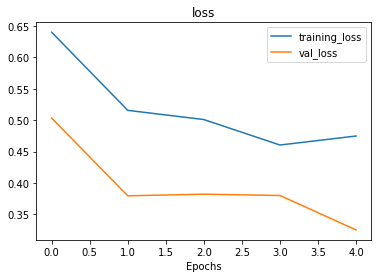

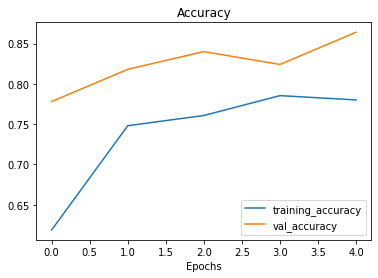

In [ ]:
# Check model's preformance history training on shuffled augmented data (it should be more smooth)
plot_loss_curves(history_7)

Notice with `model_7` how the performance on the training dataset improves almost immediately compared to `model_6`. This is because the training data was shuffled as it was passed to the model using the parameter `shuffle=True` in the `flow_from_directory` method.

This means the model was able to see examples of both pizza and steak images in each batch and in turn be evaluated on what it learned from both images rather than just one kind.

Also, the loss curves look a little bit smoother with shuffled data (comparing `history_6` to `history_7`).

### 7. Repeat until satisified

We've trained a few model's on our dataset already and so far they're performing pretty good.

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:
* Increase the number of model layers (e.g. add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32, 64, or 128, these numbers aren't set in stone either, they are usually found through trial and error).
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.

Adjusting each of these settings (except for the last two) during model development is usually referred to as **hyperparameter tuning**.

You can think of hyperparameter tuning as simialr to adjusting the settings on your oven to cook your favourite dish. Although your oven does most of the cooking for you, you can help it by tweaking the dials.

Let's go back to right where we started and try our original model (`model_1` or the TinyVGG architecture from [CNN explainer](https://poloclub.github.io/cnn-explainer/)).

In [ ]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/)
model_8 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # Same input shape as images
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6790 - accuracy: 0.5500 - val_loss: 0.6041 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 25s 539ms/step - loss: 0.6102 - accuracy: 0.6880 - val_loss: 0.5479 - val_accuracy: 0.7040
Epoch 3/5
47/47 [==============================] - 25s 539ms/step - loss: 0.5450 - accuracy: 0.7333 - val_loss: 0.4491 - val_accuracy: 0.7980
Epoch 4/5
47/47 [==============================] - 25s 538ms/step - loss: 0.5336 - accuracy: 0.7493 - val_loss: 0.4750 - val_accuracy: 0.7700
Epoch 5/5
47/47 [==============================] - 25s 534ms/step - loss: 0.5164 - accuracy: 0.7527 - val_loss: 0.4115 - val_accuracy: 0.8140


While the code is a bit different from model_1, the architectures are the same.

In [ ]:
# Check model_1 architecture (same as model_8)
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [ ]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 28090)            

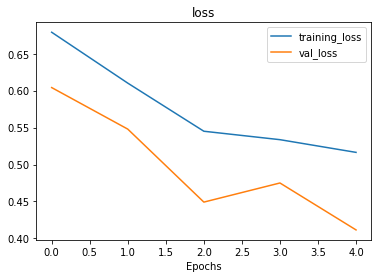

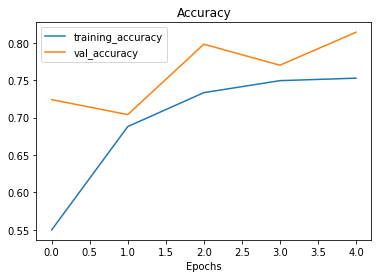

In [ ]:
# Check out the TinyVGG model preformance
plot_loss_curves(history_8)

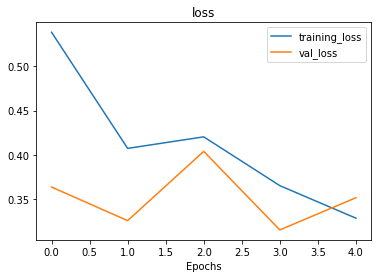

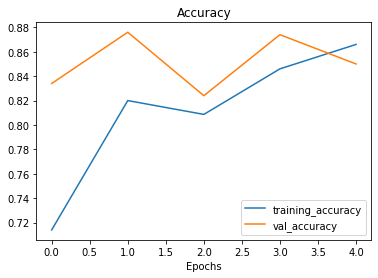

In [ ]:
# How does model_1's training curve compate to above?
plot_loss_curves(history_1)

model_8's performance on the training and test sets didn't improve much compared to model_1.

Taking another loook at the training curves, it looks like the model's performance might improve if trained a little longer (more epochs).

Perhaps that's something to do?

### Making a prediction with our trained model

What good is a trained model without makeing predictions with it?

To really test it out, upload a couple of new images and see how the model goes.

First, a reminder of the classnames and view of the image to test on.

--2021-11-09 14:04:22--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-11-09 14:04:23 (33.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



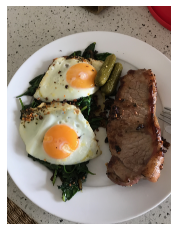

In [ ]:
import zipfile

# View an example image
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mping.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of the image
steak.shape

(4032, 3024, 3)

Since the model takes in images of shapes `(224, 224, 3)`, it is required to reshape the custom image to use it with the model.

To do so, import and decode the image using [`tf.io.read_file`](https://www.tensorflow.org/api_docs/python/tf/io/read_file) (for readining files) and [`tf.image`](https://www.tensorflow.org/api_docs/python/tf/image) (for resizing the image and turning it into a tensor).

> 🔑 **Note:** For a model to make predictions on unseen data, for example, custom images, the custom image has to be in the same shape as a model has been trained on. In more general terms, to make predictions on custom data it has to be in the same form that a model has been trained on.

In [ ]:
# Create a function to import an image & resize it to be able to be used with models
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from "filename", turns it into a tensor & reshapes it to (img_shape, img_shape, color_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 color channels
  # (the model is trained on images with 3 couour channels & sometimes images have 4 color channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size the model was trained on)
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image (normilize all values to be between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in & preprocess the custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

There's one more problem...

Although the custom image is in the same shape as the images the model has been trained on, it's still missing a dimension.

Remember how the model was trained in batches?

Well, the batch size becomes the first dimension.

So in reality, the model was trained on data in the shape of `(batch_size, 224, 224, 3)`.

This can be fixed by adding an extra axis to our custom image tensor using [`tf.expand_dims`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [ ]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dim at axis 0
#steak = steak[tf.newaxis, ...] # alternitive, '...' stands for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [ ]:
# Now that the custom image has a batch size of 1, make a prediction on it
pred = model_8.predict(steak)
pred

array([[0.8224064]], dtype=float32)

The predictions come out in **prediction probability** form. In other words, this means how likely the image is to be one class or another.

Since this is a binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is most likely to be the **postive class** (class 1).

And if the prediction probability is under 0.5, according to the model, the predicted class is most likely to be the **negative class** (class 0).

> 🔑 **Note:** The 0.5 cutoff can be adjusted to my liking. For example, I could set the limit to be 0.8 and over for the positive class and 0.2 for the negative class. However, doing this will almost always change my model's performance metrics so be sure to make sure they change in the right direction.

But saying positive and negative class doesn't make much sense when working with pizza 🍕 and steak 🥩...

So a little function to convert predictions into their class names and then plot the target image would be a good idea to write.

In [ ]:
# Reminder of the class names
class_names

array(['.DS_Store', 'pizza', 'steak'], dtype='<U9')

In [ ]:
# Index the  predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class, pred

('pizza', array([[0.8224064]], dtype=float32))

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with 
  a trained model & plots the image with the predicted class as the title.
  """
  # Import the target image & preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image & predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);


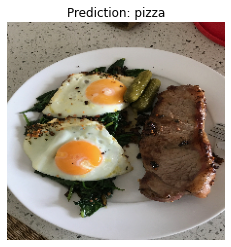

In [ ]:
# Test the model on a cutom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

It works, but the prediction is wrong...

Making another attempt with a different image.

--2021-11-09 14:04:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-11-09 14:04:25 (42.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



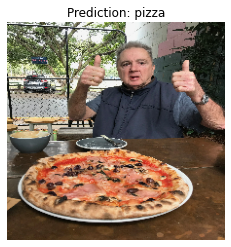

In [ ]:
# Download another test image & make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

## Multi-class Classification

> 🛠 **Practice:** Before scrolling down, how do you think we might change our model to work with 10 classes of the same kind of images? Assume the data is in the same style as our two class problem. (Change the output layer from 1 neuron to 10?)

Remember the steps taken to build the pizza 🍕 vs. steak 🥩 classifier?

Try go through those steps again, except this time, work with 10 different types of food.

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat the baseline)
7. Repeat until satisfied

![](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/misc-tensorflow-workflow-outline.png)
*The workflow we're about to go through is a slightly modified version of the above image. As you keep going through deep learning problems, you'll find the workflow above is more of an outline than a step-by-step guide.*

###1. Inport & become one with the data.
From the [Food101 dataset](https://www.kaggle.com/dansbecker/food-101) pull out another 8 classes.

In [ ]:
import zipfile

# Download zip file containing 10 food classes
# Check out how the data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-11-09 14:04:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 64.233.181.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   174MB/s    in 2.8s    

2021-11-09 14:04:29 (174 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Now check out the file structure of the `10_food_classes` file.

In [ ]:
import os

# Walk through 10_food_classes dir & list num of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 

If correct, setup dir paths for training and tests.

In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

& get the names of the subdirectories.

In [ ]:
# Get the class names for multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Look at an image from the training set.

image shape: (512, 512, 3)


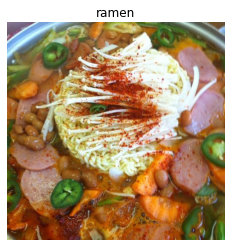

In [ ]:
#View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

###2. Preprocess the data (preparing it for a model)

After going through a selection of images (at least 10-100) to make sure the directories are set up right.

Time to preprocess the data.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data & create data gen instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories & turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # Changed to catagorical
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


Like with binary classification, this uses image generators. The main difference is that the `class_mode` has been changed to `catagorical` due to the 10 different classes of food images.

Everything else is the same.

> 224x224 is a very common size for preprocessing images.

###3. Create a model (start with a baseline)
The same model used in the binary classification problem can be used for the multi-class problem. It just needs to be modified.
Namely:


*   Changing the output layer to have 10 output neurons (= to the num of classes)
*   Changing the output layer to use `'softmax'` activation instedad of `'sigmoid'` activation.
*Changing the loss function to be `'catagorical_crossentropy'` instead of `'binary_crossentropy'`.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create a model (a clone of model_8, except multi-class)
model_9 = Sequential([
                      Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation='relu'),
                      Conv2D(10, 3, activation='relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation='softmax') # Changed to have neurons equal to num of classes (10) & 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # Changed to 'catagorical_crossentropy'
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

### 4. Fit a model
After creating a model sutable to the 10 classes, fit it to the data.

In [ ]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 56s 235ms/step - loss: 2.1949 - accuracy: 0.1900 - val_loss: 2.0919 - val_accuracy: 0.2356
Epoch 2/5
235/235 [==============================] - 54s 228ms/step - loss: 1.9483 - accuracy: 0.3207 - val_loss: 1.9048 - val_accuracy: 0.3332
Epoch 3/5
235/235 [==============================] - 55s 233ms/step - loss: 1.7256 - accuracy: 0.4128 - val_loss: 1.9166 - val_accuracy: 0.3480
Epoch 4/5
235/235 [==============================] - 54s 231ms/step - loss: 1.3610 - accuracy: 0.5531 - val_loss: 2.0065 - val_accuracy: 0.3300
Epoch 5/5
235/235 [==============================] - 54s 228ms/step - loss: 0.7304 - accuracy: 0.7644 - val_loss: 2.5359 - val_accuracy: 0.3052


The reason it is taking longer to train than model_8 is because of the 5x bigger data set. The more data there is, the longer a model will train.

### 5. Evaluate the model
Now to see how well this model did.

In [ ]:
# Evaluate the data
model_9.evaluate(test_data)

79/79 [==============================] - 13s 161ms/step - loss: 2.5359 - accuracy: 0.3052


[2.5358922481536865, 0.3052000105381012]

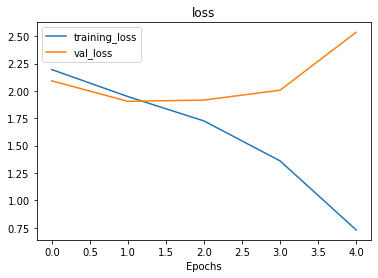

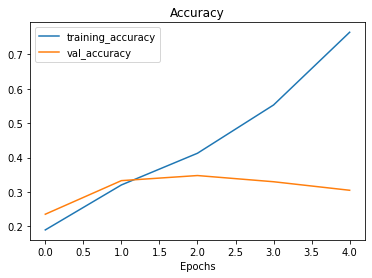

In [ ]:
# Check out the model's loss curves on the 10 classes of data (method above)
plot_loss_curves(history_9)

There is a large difference between the training & test data. Likley due to **overfitting**.

### 6. Adjust the model parameters
It is clear from the training data that the model is learning. But it's failyer at the test data shows that it can't apply what it has learned to real life.

The ideal result is that the model preforms the same for the test data.

The next steps will be about preventing overfitting. Some examples of ways to do that include:
- **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
- **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
- **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
- **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

> 🔑 **Note:** Preventing overfitting is also referred to as **regularization**.

If a sufficiant data set already exists, trying some of the last 3 options first might be the best corse of action. Because increasing the databace involves taking more images of food. "Why get up from your chair when you can solve the problem while being a couch potato" (me, 11/8/21)

The first option to be tested is simplifying the model.

This will be done by removing 2 convolutional layers. Halving the total number.




In [ ]:
# Try a simplified model (removed 2 layers)
model_10 = Sequential([
                       Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
                       MaxPool2D(),
                       Conv2D(10, 3, activation='relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10  = model_10.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 51s 214ms/step - loss: 2.1536 - accuracy: 0.2464 - val_loss: 1.9514 - val_accuracy: 0.3132
Epoch 2/5
235/235 [==============================] - 49s 210ms/step - loss: 1.7988 - accuracy: 0.3893 - val_loss: 1.9161 - val_accuracy: 0.3256
Epoch 3/5
235/235 [==============================] - 51s 215ms/step - loss: 1.4299 - accuracy: 0.5307 - val_loss: 1.9988 - val_accuracy: 0.3360
Epoch 4/5
235/235 [==============================] - 49s 209ms/step - loss: 0.9810 - accuracy: 0.6887 - val_loss: 2.2568 - val_accuracy: 0.2972
Epoch 5/5
235/235 [==============================] - 48s 205ms/step - loss: 0.5474 - accuracy: 0.8425 - val_loss: 2.6923 - val_accuracy: 0.2816


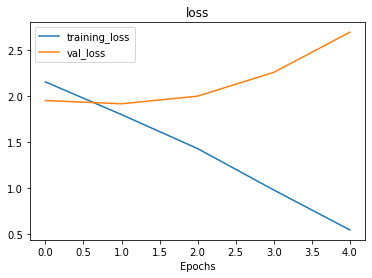

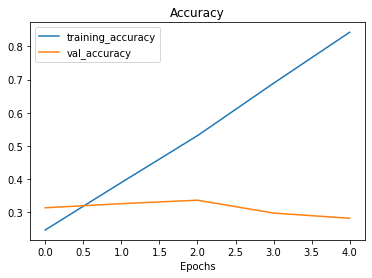

In [ ]:
# redo step 5: check out the loss curves of 10
plot_loss_curves(history_10)

In this case, even simplifieng the model is not enough. It is still overfitting.

Another option to remove overfitting is **data augmentation**.

Data augmentation modifies the training data, making the model not able to the the exact same picture twice. Hopefully making what paterns it learns more Hmm... even with a simplifed model, it looks like our model is still dramatically overfitting the training data.

A new instance of [`ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) will be made, this one with paramater such as `rotation_range` & `horizontal_flip` to manipulate the training images.

In [ ]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=20, # note: this is int
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


Not to thest `model_10` with the augmented data!

There is a useful function in tensorFlow called [`clone_model`](https://www.tensorflow.org/api_docs/python/tf/keras/models/clone_model) which can take an exzisting model and rebuild it in the same format. 

The new model will have the same structure but none of the weights of the original moded that have been learned.

> 🔑 **Note:** One of the key practices in deep learning and machine learning in general is to **be a serial experimenter**. That's what we're doing here. Trying something, seeing if it works, then trying something else. A good experiment setup also keeps track of the things you change, for example, that's why we're using the same model as before but with different data. The model stays the same but the data changes, this will let us know if augmented training data has any influence over performance.

In [ ]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same as used for model_10)
model_11.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 124s 527ms/step - loss: 2.2335 - accuracy: 0.1852 - val_loss: 2.0164 - val_accuracy: 0.2840
Epoch 2/5
235/235 [==============================] - 122s 519ms/step - loss: 2.0803 - accuracy: 0.2592 - val_loss: 1.9647 - val_accuracy: 0.3052
Epoch 3/5
235/235 [==============================] - 120s 513ms/step - loss: 2.0325 - accuracy: 0.2784 - val_loss: 1.9257 - val_accuracy: 0.3116
Epoch 4/5
235/235 [==============================] - 118s 503ms/step - loss: 2.0093 - accuracy: 0.3011 - val_loss: 1.8779 - val_accuracy: 0.3420
Epoch 5/5
235/235 [==============================] - 125s 530ms/step - loss: 1.9777 - accuracy: 0.3156 - val_loss: 1.8466 - val_accuracy: 0.3664


This takes longer than model_10 because the data is being augmented on the fly on the CPU before being loaded into the GPU. 

Redo step 5 to see the model's training curves.

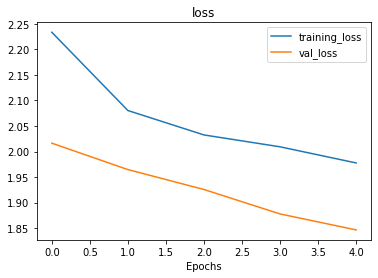

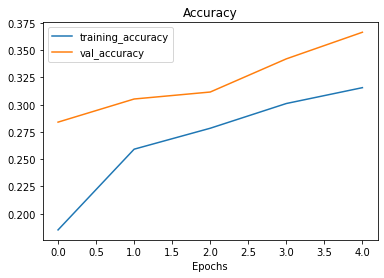

In [ ]:
# Check out model_11's preformance with augmented data
plot_loss_curves(history_11)

model_11 is significantly improved compared to model_10. The loss curves are much closer to each other. While it did worse on the training set, what matters is the testing set.

If the modelis trained on more epochs, the results may continue to improve.

### 7. Repeat until satisfied
Step 6 can continue to be repeted. Other options such as retructuring the model architecture, adding more layers, trying it out, adjucting the learning rate, testing it, trying different methods of data augmentation, trainin for longer, etc. But this could take a while.

Another option that has not been atempted yet is **transfer learning**.

This will be done in the next notebook.

The rest of this notebook will be dedicated to making predictions.

## Making a prediction with the trained model

A model is only useful if you can actually use it.

First review the classes the model has been trained with, then download new custom images to work with.

In [ ]:
# What classes has the model trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

Now to upload the custom images:

In [ ]:
# -q is for "quied" (aka no string output)
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

Now that there are some custom images, use the `pred_and_plot` funtction to make a prediction with model_11 on an image & plot it:

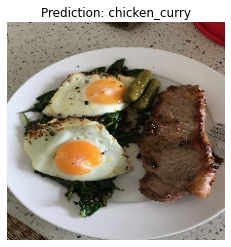

In [ ]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

Fail, try another:

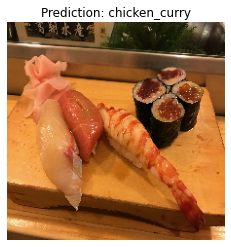

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

`chicken_curry` again? 
How about one more time?

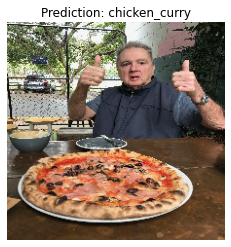

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

`chicken_curry` for the third time in a row! There must be something wrong...
It has something do do with the `pred_and_plot` fn.
To test this theory, make a prediction without using the fn.

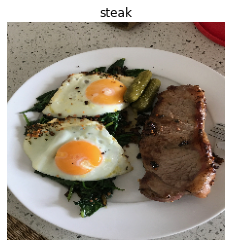

In [ ]:
# Load in & preprocess a custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the hights prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

It works! Something has to be wrong with the `pred_and_plot` fn.
The `pred_and_plot` function was ment for binary classification problems with 2 classes. NOT catagorical with 3+ classes.
The main problem is the outpu tof the `predict` fn.

In [ ]:
# Check the output of the predict fn.
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

array([[0.03283133, 0.04106759, 0.03734649, 0.12021279, 0.06584317,
        0.04704625, 0.02575141, 0.05175608, 0.5182687 , 0.05987616]],
      dtype=float32)

Model_11 has a `softmax` activation fn that outputs the prediction probability for each of the 10 classes in the model.

The class the model belives the image belongs to is the one with the highest probability.

The max value index can be found with the help of [`argmax`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html), which can be used to index the `class_names` list to output the predicted class.

In [ ]:
# Find the predicted class name:
class_names[pred.argmax()]

'steak'

To fix the problem, `pred_and_plot` can be changed to work with multiple classes as well.

In [ ]:
# Adjust fn to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with the given
   trained model, then plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # Check if multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one, round
  
  # Plot the image & predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Now to try it out:

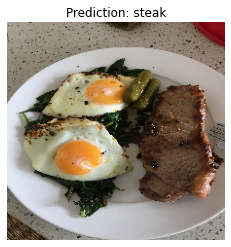

In [ ]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

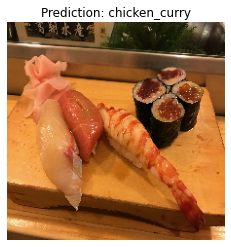

In [ ]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

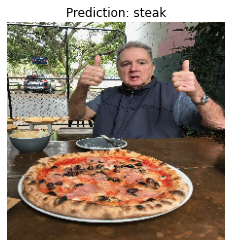

In [ ]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

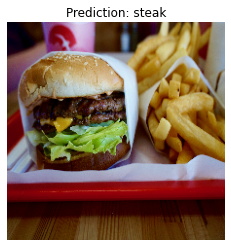

In [ ]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

The model's predictions are not good (it only has a ~35% accuracy on the test data)

## Saving and loading models

Once a model is trained, it likley needs to be saved and loaded somewhere else.

The [`save`](https://www.tensorflow.org/tutorials/keras/save_and_load) and [`load_model`](https://www.tensorflow.org/tutorials/keras/save_and_load) functions can do this.

In [ ]:
# Save a model
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [ ]:
# Load in a model & evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 12s 152ms/step - loss: 1.8466 - accuracy: 0.3664


[1.846590280532837, 0.36640000343322754]

In [ ]:
# Compare to unsaved results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 12s 154ms/step - loss: 1.8466 - accuracy: 0.3664


[1.846590280532837, 0.36640000343322754]

## 🛠 Exercises

1. Spend 20-minutes reading and interacting with the [CNN explainer website](https://poloclub.github.io/cnn-explainer/). 
 * What are the key terms? e.g. explain convolution in your own words, pooling in your own words

2. Play around with the "understanding hyperparameters" section in the [CNN explainer](https://poloclub.github.io/cnn-explainer/) website for 10-minutes.
  * What is the kernel size?
  * What is the stride? 
  * How could you adjust each of these in TensorFlow code?

3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've built here.

4. Find an ideal learning rate for a simple convolutional neural network model on your the 10 class dataset.

## 📖 Extra-curriculum

1. **Watch:** [MIT's Introduction to Deep Computer Vision](https://www.youtube.com/watch?v=iaSUYvmCekI&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=3) lecture. This will give you a great intuition behind convolutional neural networks.

2. **Watch:** Deep dive on [mini-batch gradient descent](https://youtu.be/-_4Zi8fCZO4) by deeplearning.ai. If you're still curious about why we use **batches** to train models, this technical overview covers many of the reasons why.

3. **Read:** [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/) class notes. This will give a very deep understanding of what's going on behind the scenes of the convolutional neural network architectures we're writing. 

4. **Read:** ["A guide to convolution arithmetic for deep learning"](https://arxiv.org/pdf/1603.07285.pdf). This paper goes through all of the mathematics running behind the scenes of our convolutional layers.

5. **Code practice:** [TensorFlow Data Augmentation Tutorial](https://www.tensorflow.org/tutorials/images/data_augmentation). For a more in-depth introduction on data augmentation with TensorFlow, spend an hour or two reading through this tutorial.